In [10]:
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the height column
heights = df['Z (in)']
X_values = df['X (in)']
Y_values = df['Y (in)']


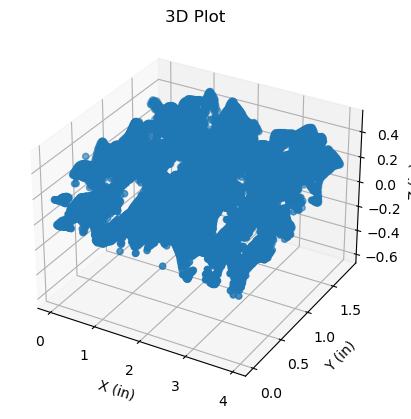

In [12]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(X_values, Y_values, heights)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot')

plt.show()

In [29]:
# Find peaks using scipy.signal.find_peaks
peaks, _ = scipy.signal.find_peaks(heights, prominence=0.50)  # Adjust prominence as needed

# Extract peak heights
peak_heights = heights.iloc[peaks]
peak_X_values = X_values.iloc[peaks]
peak_Y_values = Y_values.iloc[peaks]


In [30]:
for i, peak_height in enumerate(peak_heights):
    print(f"Peak Height: {peak_height}, Corresponding X: {peak_X_values.iloc[i]}, Corresponding Y: {peak_Y_values.iloc[i]}")

Peak Height: 0.430707, Corresponding X: 0.81496, Corresponding Y: 1.691667
Peak Height: 0.441454, Corresponding X: 1.051181, Corresponding Y: 1.827778
Peak Height: 0.458188, Corresponding X: 1.062992, Corresponding Y: 1.827778
Peak Height: 0.471712, Corresponding X: 1.074803, Corresponding Y: 1.808333
Peak Height: 0.474738, Corresponding X: 1.086614, Corresponding Y: 1.808333
Peak Height: 0.472829, Corresponding X: 1.098425, Corresponding Y: 1.788889
Peak Height: 0.468577, Corresponding X: 1.110236, Corresponding Y: 1.788889
Peak Height: 0.460485, Corresponding X: 1.122047, Corresponding Y: 1.788889
Peak Height: 0.456711, Corresponding X: 1.133858, Corresponding Y: 1.711111
Peak Height: 0.457661, Corresponding X: 1.145669, Corresponding Y: 1.691667
Peak Height: 0.456307, Corresponding X: 1.15748, Corresponding Y: 1.672222
Peak Height: 0.456755, Corresponding X: 1.169291, Corresponding Y: 1.672222
Peak Height: 0.453489, Corresponding X: 1.181102, Corresponding Y: 1.672222
Peak Height: 0

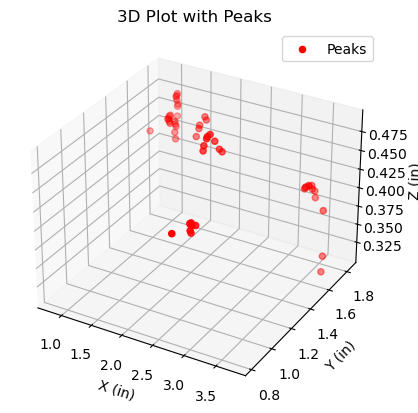

In [31]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
#ax.scatter(X_values, Y_values, heights, color='b', label='All points')

# Plot peak points
ax.scatter(peak_X_values, peak_Y_values, peak_heights, color='r', label='Peaks')

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot with Peaks')
ax.legend()

plt.show()


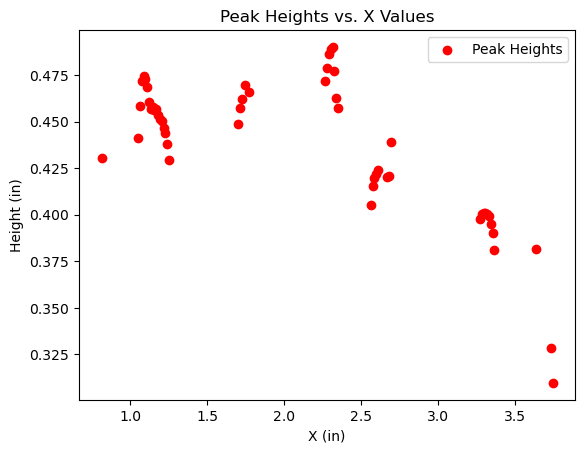

In [32]:
import matplotlib.pyplot as plt

# Plot X values against corresponding peak heights
plt.figure()
plt.scatter(peak_X_values, peak_heights, color='red', label='Peak Heights')
plt.xlabel('X (in)')
plt.ylabel('Height (in)')
plt.title('Peak Heights vs. X Values')
plt.legend()
plt.show()


In [33]:
print(len(peak_heights))

52


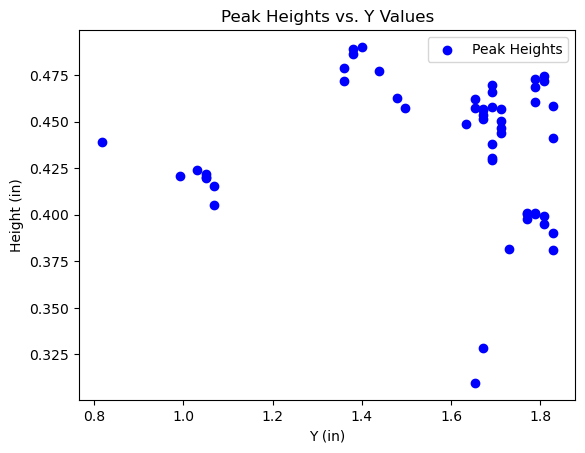

In [34]:
import matplotlib.pyplot as plt

# Plot Y values against corresponding peak heights
plt.figure()
plt.scatter(peak_Y_values, peak_heights, color='blue', label='Peak Heights')
plt.xlabel('Y (in)')
plt.ylabel('Height (in)')
plt.title('Peak Heights vs. Y Values')
plt.legend()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the height column
heights = df['Z (in)']
X_values = df['X (in)']
Y_values = df['Y (in)']

# Find peaks using scipy.signal.find_peaks
peaks, _ = scipy.signal.find_peaks(heights, prominence=0.5)  # Adjust prominence as needed

# Extract peak heights
peak_heights = heights.iloc[peaks]
peak_X_values = X_values.iloc[peaks]
peak_Y_values = Y_values.iloc[peaks]

# Find the minimum and maximum peak heights
min_peak_height = peak_heights.min()
max_peak_height = peak_heights.max()

# Create a meshgrid for X and Y
X, Y = np.meshgrid(X_values, Y_values)



In [ ]:
# Create a meshgrid for Z with minimum and maximum peak heights
Z_min = np.full_like(X, min_peak_height)
Z_max = np.full_like(X, max_peak_height)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



In [ ]:
# Plot wireframe graph between min and max heights
ax.plot_wireframe(X, Y, Z_min, color='b', label='Min Height')
ax.plot_wireframe(X, Y, Z_max, color='r', label='Max Height')

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('Wireframe Graph between Min and Max Heights')
ax.legend()

plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

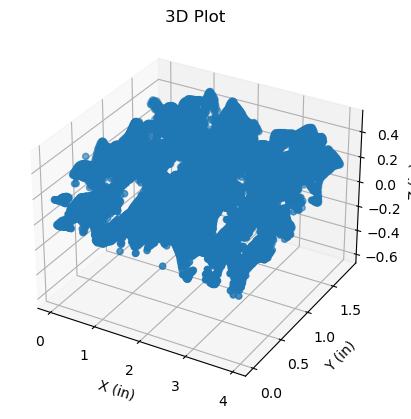

In [8]:
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the height column
heights = df['Z (in)'].values  # Convert to numpy array
X_values = df['X (in)']
Y_values = df['Y (in)']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(X_values, Y_values, heights)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot')

# Find peaks using scipy.signal.find_peaks
window_size = 3  # Define the window size for finding peaks in the surrounding
peaks_data = []

# Iterate over each row and column to find peaks in the surrounding
for i in range(len(df)):
    for j in range(len(df)):
        # Define the region of interest around the current position
        row_start = max(0, i - window_size)
        row_end = min(len(df), i + window_size + 1)
        col_start = max(0, j - window_size)
        col_end = min(len(df), j + window_size + 1)
        
        # Extract the region of interest
        region_heights = heights[row_start:row_end]  # Slice along rows
        region_heights = region_heights[:, col_start:col_end]  # Slice along columns
        
        # Find peaks in the region
        peaks, _ = find_peaks(region_heights.flatten(), prominence=0.4)  # Adjust prominence as needed
        
        # Adjust peak indices to the original coordinates
        peak_indices = np.unravel_index(peaks, region_heights.shape)
        peak_indices = (peak_indices[0] + row_start, peak_indices[1] + col_start)
        
        # Store peak indices and heights
        for peak_index in zip(*peak_indices):
            peaks_data.append((peak_index[0], peak_index[1], region_heights[peak_index]))

# Extract peak data
peak_X_values = [X_values[i] for i, _, _ in peaks_data]
peak_Y_values = [Y_values[j] for _, j, _ in peaks_data]
peak_heights = [height for _, _, height in peaks_data]

# Plot peak points
ax.scatter(peak_X_values, peak_Y_values, peak_heights, color='r', label='Peaks')

ax.legend()
plt.show()


KeyboardInterrupt: 

TypeError: 'int' object is not iterable

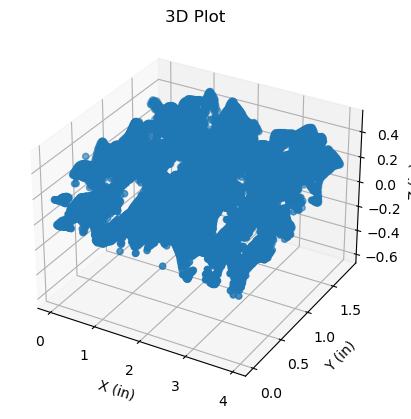

In [9]:
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the height column
heights = df['Z (in)'].values  # Convert to numpy array
X_values = df['X (in)']
Y_values = df['Y (in)']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(X_values, Y_values, heights)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot')

# Find peaks using scipy.signal.find_peaks
window_size = 3  # Define the window size for finding peaks in the surrounding
peaks_data = []

# Iterate over each row and column to find peaks in the surrounding
for i in range(len(df)):
    for j in range(len(df)):
        # Define the region of interest around the current position
        row_start = max(0, i - window_size)
        row_end = min(len(df), i + window_size + 1)
        col_start = max(0, j - window_size)
        col_end = min(len(df), j + window_size + 1)
        
        # Extract the region of interest
        region_heights = heights[row_start:row_end]  # Slice along rows
        region_heights = region_heights[col_start:col_end]  # Slice along columns
        
        # Find peaks in the region
        peaks, _ = find_peaks(region_heights, prominence=0.4)  # Adjust prominence as needed
        
        # Adjust peak indices to the original coordinates
        peak_indices = peaks + col_start  # Add offset for columns
        peak_indices = (i, peak_indices)  # Row index remains the same
        
        # Store peak indices and heights
        for peak_index in zip(*peak_indices):
            peaks_data.append((peak_index[0], peak_index[1], region_heights[peak_index[1] - col_start]))

# Extract peak data
peak_X_values = [X_values[i] for i, _, _ in peaks_data]
peak_Y_values = [Y_values[j] for _, j, _ in peaks_data]
peak_heights = [height for _, _, height in peaks_data]

# Plot peak points
ax.scatter(peak_X_values, peak_Y_values, peak_heights, color='r', label='Peaks')

ax.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

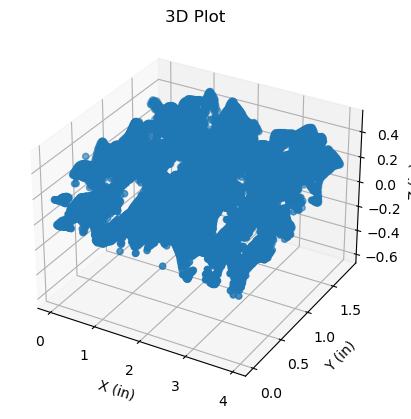

In [10]:
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the height column
heights = df['Z (in)'].values  # Convert to numpy array
X_values = df['X (in)']
Y_values = df['Y (in)']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(X_values, Y_values, heights)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot')

# Find peaks using scipy.signal.find_peaks
window_size = 500  # Define the window size for finding peaks in the surrounding
peaks_data = []

# Iterate over every 500th point
for i in range(0, len(df), 500):
    for j in range(0, len(df), 500):
        # Define the region of interest around the current position
        row_start = max(0, i - window_size)
        row_end = min(len(df), i + window_size + 1)
        col_start = max(0, j - window_size)
        col_end = min(len(df), j + window_size + 1)
        
        # Extract the region of interest
        region_heights = heights[row_start:row_end]  # Slice along rows
        region_heights = region_heights[:, col_start:col_end]  # Slice along columns
        
        
        
        # Find peaks in the region
        peaks, _ = find_peaks(region_heights.flatten(), prominence=0.4)  # Adjust prominence as needed
        
        # Adjust peak indices to the original coordinates
        peak_indices = np.unravel_index(peaks, region_heights.shape)
        peak_indices = (peak_indices[0] + row_start, peak_indices[1] + col_start)
        
        # Store peak indices and heights
        for peak_index in zip(*peak_indices):
            peaks_data.append((peak_index[0], peak_index[1], region_heights[peak_index]))

# Extract peak data
peak_X_values = [X_values[i] for i, _, _ in peaks_data]
peak_Y_values = [Y_values[j] for _, j, _ in peaks_data]
peak_heights = [height for _, _, height in peaks_data]

# Plot peak points
ax.scatter(peak_X_values, peak_Y_values, peak_heights, color='r', label='Peaks')

ax.legend()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

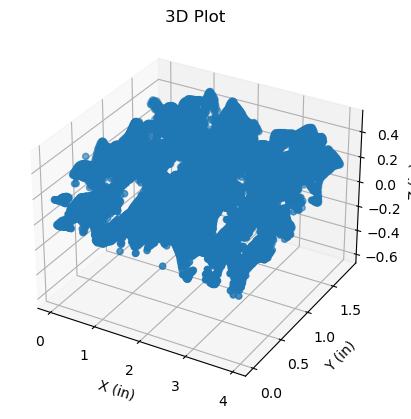

In [11]:
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the height column
heights = df['Z (in)'].values  # Convert to numpy array
X_values = df['X (in)']
Y_values = df['Y (in)']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(X_values, Y_values, heights)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot')

# Find peaks using scipy.signal.find_peaks
window_size = 3  # Define the window size for finding peaks in the surrounding
peaks_data = []

# Iterate over every 500th point
for i in range(0, len(df), 500):
    for j in range(0, len(df), 500):
        # Define the region of interest around the current position
        row_start = max(0, i - window_size)
        row_end = min(len(df), i + window_size + 1)
        col_start = max(0, j - window_size)
        col_end = min(len(df), j + window_size + 1)
        
        # Extract the region of interest
        region_heights = heights[row_start:row_end, col_start:col_end]
        
        # Convert the 2D region to a 1D array
        region_heights_1d = region_heights.flatten()
        
        # Find peaks in the region
        peaks, _ = find_peaks(region_heights_1d, prominence=0.4)  # Adjust prominence as needed
        
        # Adjust peak indices to the original coordinates
        peak_indices = np.unravel_index(peaks, region_heights.shape)
        peak_indices = (peak_indices[0] + row_start, peak_indices[1] + col_start)
        
        # Store peak indices and heights
        for peak_index in zip(*peak_indices):
            peaks_data.append((peak_index[0], peak_index[1], region_heights[peak_index]))

# Extract peak data
peak_X_values = [X_values[i] for i, _, _ in peaks_data]
peak_Y_values = [Y_values[j] for _, j, _ in peaks_data]
peak_heights = [height for _, _, height in peaks_data]

# Plot peak points
ax.scatter(peak_X_values, peak_Y_values, peak_heights, color='r', label='Peaks')

ax.legend()
plt.show()


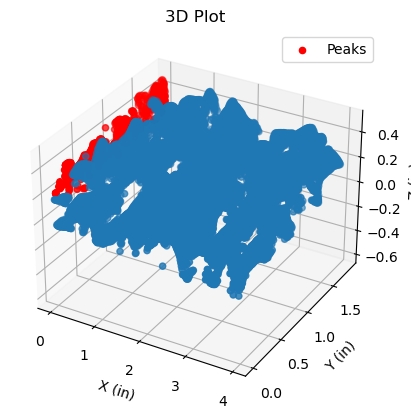

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Extract the X, Y, and Z columns
X_values = df['X (in)'].values
Y_values = df['Y (in)'].values
heights = df['Z (in)'].values

# Determine the length and width of the grid
length = len(np.unique(X_values))
width = len(np.unique(Y_values))

# Reshape the heights array into a 2D grid
heights_grid = heights.reshape((length, width))

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(X_values, Y_values, heights)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Z (in)')
ax.set_title('3D Plot')

# Find peaks using find_peaks function
peaks, _ = find_peaks(heights_grid.flatten(), prominence=0.2)  # Adjust prominence as needed

# Extract peak data
peak_indices = np.unravel_index(peaks, (length, width))

# Plot peak points
ax.scatter(X_values[peak_indices[0]], Y_values[peak_indices[1]], heights_grid[peak_indices], color='r', label='Peaks')

ax.legend()
plt.show()


In [19]:
import pandas as pd
from scipy.signal import find_peaks

# Read CSV into pandas DataFrame
df = pd.read_csv("a240402b.csv")

# Define chunk size
chunk_size = 800

# Group DataFrame into chunks
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# Function to find peaks within each chunk
def find_peaks_in_chunk(chunk):
    peaks, _ = find_peaks(chunk['Z (in)'], distance=50)  # Adjust distance as needed
    peak_heights = chunk['Z (in)'].iloc[peaks]
    peak_indices = chunk.index[peaks]
    
    # Ensure only the highest peak in each neighborhood is selected
    filtered_peaks = []
    for i, (peak, peak_index) in enumerate(zip(peak_heights, peak_indices)):
        neighborhood = chunk[max(0, i-50):min(len(chunk), i+50)]
        max_in_neighborhood = neighborhood['Z (in)'].max()
        if peak == max_in_neighborhood:
            filtered_peaks.append((chunk['X (in)'].iloc[peak_index], chunk['Y (in)'].iloc[peak_index], peak))
    
    return filtered_peaks

# Find peaks in each chunk
all_peaks = []
for chunk in chunks:
    peaks_in_chunk = find_peaks_in_chunk(chunk)
    all_peaks.extend(peaks_in_chunk)

# Output the peaks
for peak in all_peaks:
    print("Peak:", peak)


IndexError: single positional indexer is out-of-bounds